<a href="https://colab.research.google.com/github/thaugenes/4850/blob/main/HW4_JoseTorFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 4

#### Students: Tor Haugenes (th455) and Jose Osorio (jao82)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 29, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [17]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy
from scipy.stats import norm
import random




---
---


# Question 1: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


___
## Ans.


In [2]:
stock = ((0-.14)/(math.sqrt(.0625)))
usbond = ((0-0.07)/math.sqrt(.01))
embond = ((0-.16)/math.sqrt(.09))
y = (1- norm.cdf(stock))*(1-norm.cdf(usbond))*(1-norm.cdf(embond))
print("probability that all three instruments yield positive returns individually: ", y)

probability that all three instruments yield positive returns individually:  0.3796164056673423


___

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
___

## Ans.



In [3]:
sigma = [[.0625, -.01, .0375],[-.01,.01,-.015],[.0375, -.015, .09]]
l = scipy.linalg.cholesky(sigma, lower = True)
mu = [.14,.07,.16]
check = 0
for k in range(100000):
    n = np.empty(3)
    for i in range(3):
        n[i] = np.random.normal(0,1)
    sum = 0
    if (mu+np.dot(l,n) > 0).all():
        check = check + 1
print('Simulated probability: ' , check/100000)

Simulated probability:  0.36945


___
___

# Question 2: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

___

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.
___


## Ans.


Have X be a uniformly distributed random variable on $\alpha$ to $\beta$ with mean 0 and variance 1

$ \mathbb{E}[X] = 0 = \frac{(\alpha + \beta)}{2}$

$\alpha + \beta = 0$

$\beta = -\alpha$

$\mathbb{Var}[X] = 1 = \frac{(\beta - \alpha)^2}{12}$

$12 = (\beta - \alpha)^2$

$\sqrt{12} = (\beta - \alpha)$

since $\beta = -\alpha$

$2\sqrt{3} = \beta + \beta$  

$\beta = \sqrt{3}, \alpha = -\sqrt{3}$


___

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?
___

## Ans.

$\mathbb{E}[V_{2}] = \mathbb{E}[(1-B)*X_{1}+B*X_{2})]$

$= (1-B)*\mathbb{E}[X_{1}]+ B*\mathbb{E}[X_{2}]$

$ \mathbb{E}[X_{1}] = \mathbb{E}[X_{2}] = 0$

$\mathbb{E}[V_{2}] = 0 + 0 = 0$

$\mathbb{Var}[V_{2}] = \mathbb{E}[V_{2}^2] - \mathbb{E}[V_{2}]^2$

$\mathbb{E}[V_{2}]^2 = 0$

$\mathbb{E}[V_{2}^2] = \mathbb{E}[((1-B)*X_{1}+B*X_{2}))^2]$

$= \mathbb{E}[((1-B)*X_{1})^2 + 2*B*(1-B)*X_{1}X_{2} + (B*X_{2})^2]$

$\mathbb{E}[((1-B)*X_{1})^2] = \mathbb{E}[(1-B)^2]*\mathbb{E}[X_{1}^2]$

$\mathbb{E}[X_{1}^2] = \mathbb{Var}[X_{1}] + \mathbb{E}[X_{1}]^2$

$\mathbb{E}[X_{1}^2] = 1 + 0 = 1$

$\mathbb{E}[(1-B)^2] = \mathbb{E}[1] + \mathbb{E}[B^2] + -2*\mathbb{E}[B]$

$\mathbb{E}[B^2] = \mathbb{Var}[B] - \mathbb{E}[B]^2$

$\mathbb{E}[B^2] = p(1-p) + p^2 = p$

$\mathbb{E}[(1-B)^2] = 1 + p -2*p$

$\mathbb{E}[((1-B)*X_{1})^2] = 1 - p$

$\mathbb{E}[2*B*(1-B)*X_{1}X_{2}] = 0 $ since $\mathbb{E}[X_{1}] = 0$

$\mathbb{E}[(B*X_{2})^2] = p^2*1$

$\mathbb{Var}[V_{2}] =  1 - p + 0 + p = 1$

$\mathbb{E}[V_{2}] = 0 $

$\mathbb{Var}[V_{2}] = 1$

___
**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?
___

## Ans.
$Cov(V_1, V_2 )= \mathbb{E}[(V_{1} - \mathbb{E}[V_{1}]) * (V_{2} - \mathbb{E}[V_{2}])] $

 $\mathbb{E}[V_{1}*V_{2}]$

 $ = \mathbb{E}[X_{1}*((1-B)*X_{1} + B*X_{2})$

 $ = \mathbb{E}[(1-B)*X_{1}^2 + B*X_{1}*X_{2}$

 $ = \mathbb{E}[(1-B)*X_{1}^2] + \mathbb{E}[B*X_{1}*X_{2}]$

 $ = \mathbb{E}[(1-B)*X_{1}^2] = (1-p)*1^2$
  
 $\mathbb{E}[B*X_{1}*X_{2}] = 0$
  
 $Cov(V_1, V_2 )= 1-p = \sigma_{12}$

 $p = 1 - \sigma_{12}$ where $0 <= \sigma_{12} <= 1$  in order for p to be between 0 and 1

___

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

___

## Ans.

In [5]:
def generate_correlated_vars(sigma12):
    x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3))
    x2 = np.random.uniform(-np.sqrt(3), np.sqrt(3))
    p = 1-sigma12
    b = scipy.stats.bernoulli.rvs(p)
    v1 = x1
    v2 = (1-b)*x1 + b*x2
    return v1,v2

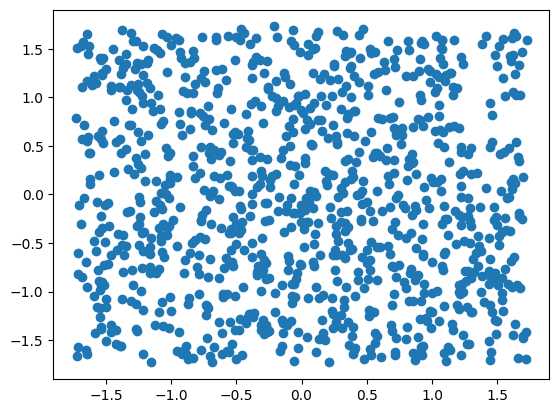

In [6]:
v1 = np.zeros(1000)
v2 = np.zeros(1000)
for i in range(1000):
    v1[i], v2[i] = generate_correlated_vars(0)
plt.scatter(v1,v2)

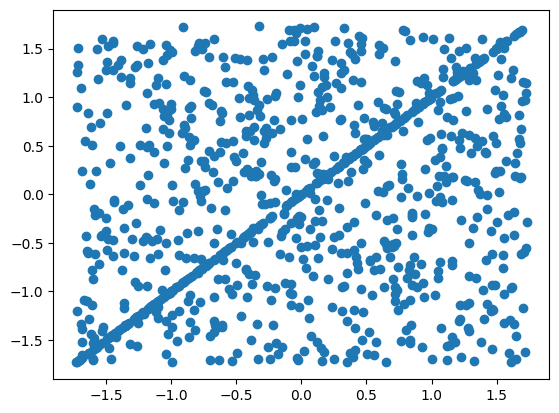

In [7]:
v1 = np.zeros(1000)
v2 = np.zeros(1000)
for i in range(1000):
    v1[i], v2[i] = generate_correlated_vars(.25)
plt.scatter(v1,v2)

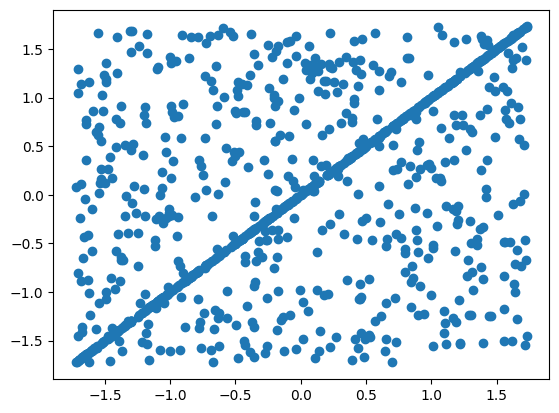

In [8]:
v1 = np.zeros(1000)
v2 = np.zeros(1000)
for i in range(1000):
    v1[i], v2[i] = generate_correlated_vars(.5)
plt.scatter(v1,v2)

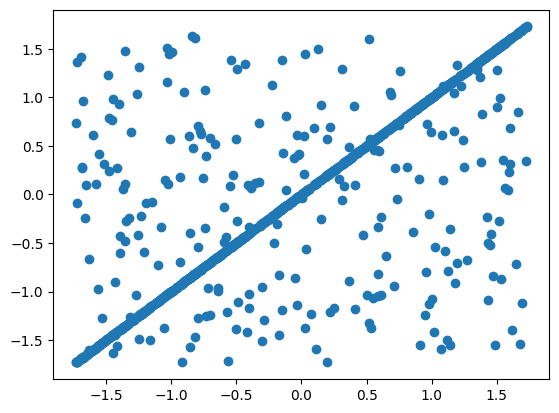

In [9]:
v1 = np.zeros(1000)
v2 = np.zeros(1000)
for i in range(1000):
    v1[i], v2[i] = generate_correlated_vars(.75)
plt.scatter(v1,v2)

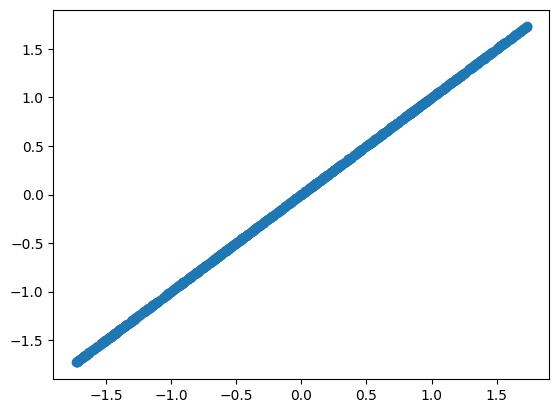

In [10]:
v1 = np.zeros(1000)
v2 = np.zeros(1000)
for i in range(1000):
    v1[i], v2[i] = generate_correlated_vars(1)
plt.scatter(v1,v2)

___

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').
___

## Ans.

In [11]:
count = 0
numsim = 10000
v1 = np.zeros(numsim)
v2 = np.zeros(numsim)
for i in range(numsim):
    v1[i],v2[i] = generate_correlated_vars(.5)
    if(v1[i] <= 0 and v2[i] <= 0):
        count += 1
print('The probability that V1 and V2 are both less than or equal to 0 is approximately ' , count/numsim  )

The probability that V1 and V2 are both less than or equal to 0 is approximately  0.3748


___

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

___

## Ans.


The probability that W1 and W2 are both greataer than or equal to 0 is approximately  0.0346


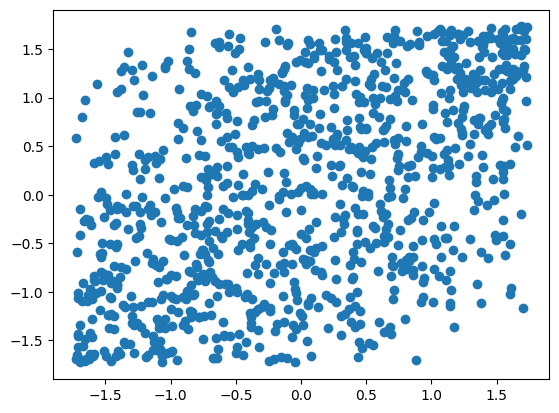

In [12]:
sigma = [[1, .5],[.5,1]]
l = scipy.linalg.cholesky(sigma, lower = True)
a = -np.sqrt(3)
b = np.sqrt(3)
count = 0
w1 = np.zeros(1000)
w2 = np.zeros(1000)
for i in range(1000):
    n =np.empty(2)
    for j in range(2):
        n[j] = np.random.normal(0,1)
    z = np.dot(l,n)
    w1[i] = a+(b-a)*scipy.stats.norm.cdf(z[0])
    w2[i] = a+(b-a)*scipy.stats.norm.cdf(z[1])
    if(w1[i] >= 0 and w2[i] >= 0):
        count+=1
print('The probability that W1 and W2 are both greataer than or equal to 0 is approximately ' , count/10000 )
plt.scatter(w1,w2)

W1 and W2 must be uniform because we are using z values that are initially normal with mean 0 and variance 1. This is where the mean and variance of W1 and W2 get their values. We are then multiplying this number by the difference in the bounds of the uniform random variable ($\beta - \alpha$). Finally, we add $\alpha$ in order to give us a variable with bounds of $\alpha$ and  $\beta$ that is also a uniform random variable.

___
___

# Question 3: Generating random samples in some given set (20 pts)

Referenced ChatGPT for this question.

___

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).
___

## Ans.

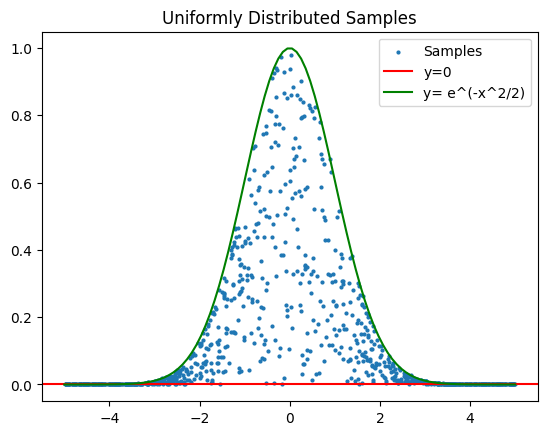

In [ ]:
samples = []

while len(samples) < 1000:
  x = np.random.uniform(-5, 5)
  y = np.random.uniform(0, np.exp((-x**2)/2))

  if y <= np.exp(-x**2/2):
    samples.append((x,y))

samples = np.array(samples)
plt.scatter(samples[:, 0], samples[:,1], label='Samples', s=4)

x_val = np.linspace(-5, 5, 100)
y_val = np.exp(-x_val**2/2)

plt.axhline(0, label = 'y=0', color='red')
plt.plot(x_val, y_val, label = 'y= e^(-x^2/2)', color = 'green')
plt.title('Uniformly Distributed Samples')
plt.legend()
plt.show()

___
**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).
___

## Ans.

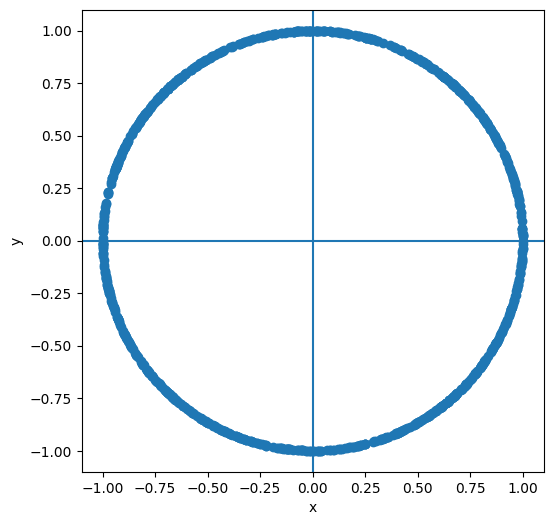

In [ ]:
u = np.random.uniform(-1,1,1000)
v = np.random.uniform(-1,1,1000)
x = u / np.sqrt(u**2 + v**2)
y = v / np.sqrt(u**2 + v**2)
thetas = np.arctan2(y,x)

plt.figure(figsize=(6,6))
plt.scatter(x,y, label="Circle of Randomly Generated Points")
plt.xlabel('x')
plt.ylabel('y')
plt.legend
plt.gca().set_aspect('equal', adjustable='box')
plt.axhline(0)
plt.axvline(0)

Text(0.5, 0, 'Angle (in Degrees)')

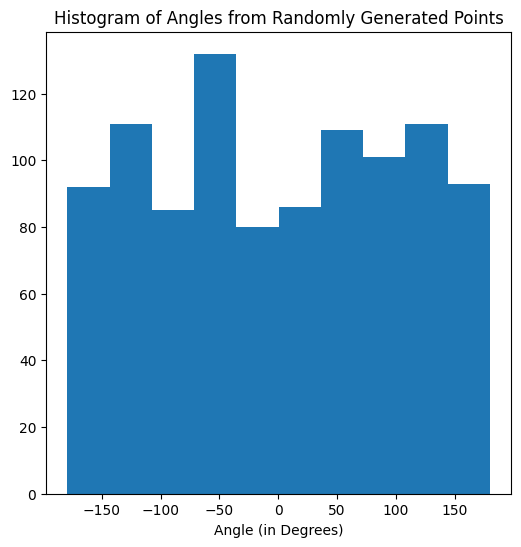

In [ ]:
theta_degrees = np.degrees(thetas)
plt.figure(figsize = (6,6))
plt.hist(theta_degrees)
plt.title('Histogram of Angles from Randomly Generated Points')
plt.xlabel('Angle (in Degrees)')


We can conclude here that the points we generated in this part are roughly uniformly distributed on the circumference of the circle. We can tell this as the histogram of angles we generated is distributed pretty evenly across the distribution as the angles all range from approximately 80% to 130%.



---

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$, and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

___

## Ans.

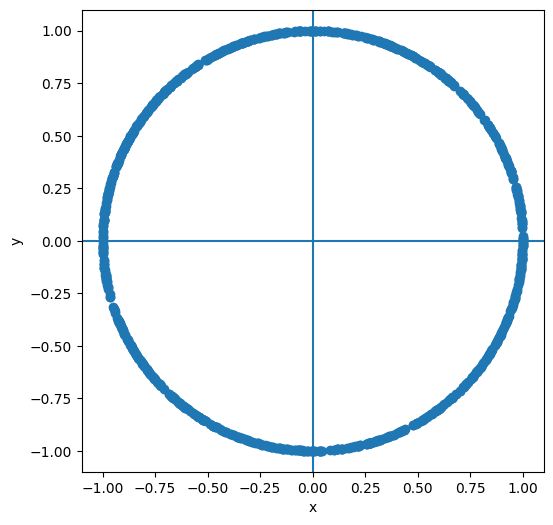

In [ ]:
z = np.random.randn(1000)
w = np.random.randn(1000)

x = z / np.sqrt(z**2 + w**2)
y = w / np.sqrt(z**2 + w**2)
thetas = np.arctan2(y,x)

plt.figure(figsize=(6,6))
plt.scatter(x,y, label = "Circle of Randomly Generated Points")
plt.xlabel('x')
plt.ylabel('y')
plt.legend
plt.gca().set_aspect('equal', adjustable='box')
plt.axhline(0)
plt.axvline(0)

Text(0.5, 0, 'Angle (in Degrees)')

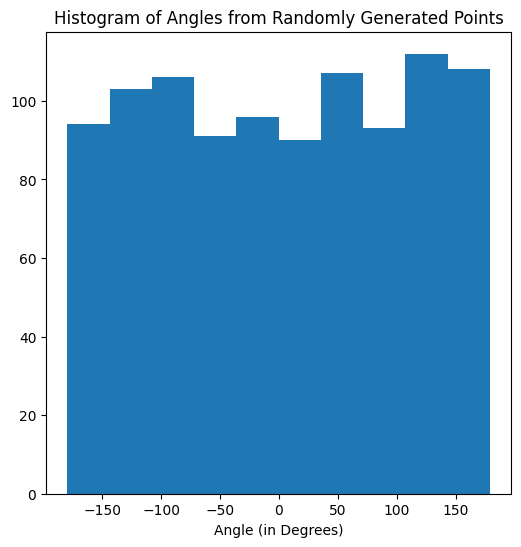

In [ ]:
theta_degrees = np.degrees(thetas)
plt.figure(figsize = (6,6))
plt.hist(theta_degrees)
plt.title('Histogram of Angles from Randomly Generated Points')
plt.xlabel('Angle (in Degrees)')


Like (b), we can see that the points that we generated follow the normal distribution for the most part as the histogram of the angles they are associated with has aroughly normal distribution.

___
___

# Question 4: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1,000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

Used ChatGPT for reference for this question.

In [18]:
passenger_arrivals = []
for i in range(10000):
  passenger_arrivals.append(random.uniform(0, 1000))

passenger_arrivals.sort()

___

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.
___


## Ans.

In [20]:
import scipy.stats as stats

In [ ]:
waiting_times = []

for arrival_time in passenger_arrivals:
    # Calculate the time until the next train arrival
    time_until_next_train = (np.ceil(arrival_time / 10) * 10) - arrival_time

    # Append waiting time to the list
    waiting_times.append(time_until_next_train)

# Calculate the overall mean and confidence intervals
average_waiting_time = np.mean(waiting_times)

var = np.var(waiting_times, ddof=1)
z = stats.norm.ppf(0.975)
LB = average_waiting_time - z*np.sqrt(var/1000)
UB = average_waiting_time + z*np.sqrt(var/1000)

# Print results
print("Estimated Expected Waiting Time: {:.2f} minutes".format(average_waiting_time))
print("\n 95% CI:  {}".format((LB, UB)))

Estimated Expected Waiting Time: 4.98 minutes

 95% CI:  (4.798419734939574, 5.15504688741249)


___
**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.
___


## Ans.

In [22]:
waiting_times = []
train_arrival_times_b = np.cumsum(np.random.exponential(10, 3*len(passenger_arrivals)))

for arrival_time in passenger_arrivals:
    # Calculate the time until the next train arrival
    next_train_time = np.min(train_arrival_times_b[train_arrival_times_b >= arrival_time])

    # Calculate waiting time
    waiting_time = next_train_time - arrival_time

    # Append waiting time to the list
    waiting_times.append(waiting_time)

# Calculate the overall mean and confidence intervals
average_waiting_time = np.mean(waiting_times)

var = np.var(waiting_times, ddof=1)
z = stats.norm.ppf(0.975)
LB = average_waiting_time - z*np.sqrt(var/1000)
UB = average_waiting_time + z*np.sqrt(var/1000)

# Print results
print("Estimated Expected Waiting Time: {:.2f} minutes".format(average_waiting_time))
print("\n 95% CI:  {}".format((LB, UB)))

Estimated Expected Waiting Time: 9.61 minutes

 95% CI:  (9.047165339580154, 10.164911169416499)


___

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

___

In [ ]:
# Calculate inter-arrival times
inter_arrival_times = np.diff(train_arrival_times)

# Calculate the mean inter-arrival time
mean_inter_arrival_time = np.mean(inter_arrival_times)
var = np.var(inter_arrival_times, ddof=1)
z = stats.norm.ppf(0.975)
LB = mean_inter_arrival_time - z*np.sqrt(var/1000)
UB = mean_inter_arrival_time + z*np.sqrt(var/1000)

# Print results
print("Estimated Expected Waiting Time: {:.2f} minutes".format(mean_inter_arrival_time))
print("\n 95% CI:  {}".format((LB, UB)))

Estimated Expected Waiting Time: 9.97 minutes

 95% CI:  (9.348129917999808, 10.58729511080435)


The train service's claim is relatively accurate. The expected wait time is just under 10 minutes and the 95% confidence interval doesn't exceed 10.587 minutes.

___

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

___

## Ans.

In [13]:
arrtime = np.diff(np.arange(0,1000,10))
#arbitrarily chose a 90% confidence interval
left = np.mean(arrtime) - scipy.stats.norm.ppf(.95)*math.sqrt(np.var(arrtime))/math.sqrt(len(arrtime))
right = np.mean(arrtime) + scipy.stats.norm.ppf(.95)*math.sqrt(np.var(arrtime))/math.sqrt(len(arrtime))
print('Left Bound: ', left, ' Mean: ', right, ' Right Bound: ', right)

Left Bound:  10.0  Mean:  10.0  Right Bound:  10.0


In [23]:
arrivaltime = np.diff(train_arrival_times_b)
#arbitrarily chose a 90% confidence interval
left = np.mean(arrivaltime) - scipy.stats.norm.ppf(.95)*math.sqrt(np.var(arrivaltime))/math.sqrt(len(arrivaltime))
right = np.mean(arrivaltime) + scipy.stats.norm.ppf(.95)*math.sqrt(np.var(arrivaltime))/math.sqrt(len(arrivaltime))
print('Left Bound: ', left, ' Mean: ', right, ' Right Bound: ', right)

Left Bound:  9.894044540507767  Mean:  10.084515808556034  Right Bound:  10.084515808556034


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  